# Pointer

*BILD VON ANWENDUNG*

Introduction Text

# Data

## Data Generation Process

- Tool React 
- Screenshot
- Video

## Data Import

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Poiinter/230112_BigMonitor_right_linebyline_center.csv")
df

,x,y,score,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,40,50,0.559691,374.764986,128.093176,371.058102,119.202440,361.412249,118.904529,347.199373,...,313.255911,379.315796,398.682108,469.947824,302.075348,485.256672,388.192654,473.784256,374.387531,480.395966
1,80,50,0.527089,362.931843,130.411603,367.012809,121.443171,350.402694,117.929886,357.146247,...,311.538843,374.519971,402.881737,477.531356,298.982624,480.676776,379.255588,431.520846,310.688989,452.665769
2,120,50,0.613392,362.063044,136.208753,365.535620,128.447546,349.646853,124.433594,355.571278,...,311.368999,375.187707,401.603469,479.813888,298.790580,478.723002,380.971027,424.403921,310.574263,451.591290
3,160,50,0.647301,359.972417,136.358143,364.222433,128.639393,347.723855,124.478142,355.034228,...,314.204517,376.511255,401.625532,483.158055,297.959443,479.547926,391.083173,423.265842,310.898639,450.581983
4,200,50,0.640223,364.851768,143.070381,365.013942,135.081262,352.366950,131.009202,351.607295,...,315.811029,380.744642,399.681004,481.616637,301.074245,476.263651,388.682130,423.595055,312.850408,449.235416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,760,50,0.619756,340.775713,168.059119,361.054194,139.436588,312.824656,142.691415,383.832964,...,248.682617,466.548383,363.953722,447.461851,232.590294,451.851789,360.395702,451.531201,260.237802,463.625551
2899,800,50,0.596481,342.190506,152.707964,362.178760,122.834012,310.356006,125.532145,383.611128,...,238.705668,465.784092,386.158057,461.892505,218.490967,466.773899,372.628107,428.264477,12.333569,14.545566
2900,840,50,0.651246,346.388042,139.959822,365.599507,109.187333,311.427261,111.096334,383.398047,...,245.192527,473.623718,436.074377,469.771923,200.474639,475.102788,361.875876,454.964047,337.008352,463.694504
2901,880,50,0.631737,357.678411,103.426088,374.953667,73.152693,319.160072,74.169653,383.040839,...,246.714288,469.592664,449.125176,470.749174,177.436421,467.983258,332.226153,460.657039,322.286529,464.855795


## Data Cleaning


### Filter for relevant Data (Upper Body)

In [ ]:
df = df.iloc[:, 0:25]
df

,x,y,score,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,...,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,40,50,0.559691,374.764986,128.093176,371.058102,119.202440,361.412249,118.904529,347.199373,...,309.163890,169.577279,379.254818,267.358332,411.237822,143.232021,481.887865,101.901748,482.072058,102.156129
1,80,50,0.527089,362.931843,130.411603,367.012809,121.443171,350.402694,117.929886,357.146247,...,304.428613,171.141640,375.247015,280.652291,401.695980,142.657177,381.260455,347.502723,467.061891,99.132072
2,120,50,0.613392,362.063044,136.208753,365.535620,128.447546,349.646853,124.433594,355.571278,...,305.145877,172.900383,375.839928,289.778223,408.696497,135.059536,389.084944,375.019620,463.067252,97.444092
3,160,50,0.647301,359.972417,136.358143,364.222433,128.639393,347.723855,124.478142,355.034228,...,306.526753,174.181501,374.724717,293.953567,405.846114,140.964114,392.093449,383.502758,462.581847,101.123556
4,200,50,0.640223,364.851768,143.070381,365.013942,135.081262,352.366950,131.009202,351.607295,...,309.968890,175.659020,376.862710,292.614646,408.897689,141.159240,393.829514,380.966344,463.858881,105.614654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,760,50,0.619756,340.775713,168.059119,361.054194,139.436588,312.824656,142.691415,383.832964,...,257.048400,268.754194,401.242279,312.960765,238.056867,418.787922,404.887319,393.706597,290.006103,456.341580
2899,800,50,0.596481,342.190506,152.707964,362.178760,122.834012,310.356006,125.532145,383.611128,...,244.510069,266.327761,400.398947,299.443563,218.775329,423.550036,405.051161,378.807154,299.799104,453.588616
2900,840,50,0.651246,346.388042,139.959822,365.599507,109.187333,311.427261,111.096334,383.398047,...,238.193710,258.926301,400.363393,304.839288,205.298039,421.262365,406.000677,386.024907,182.760632,467.791597
2901,880,50,0.631737,357.678411,103.426088,374.953667,73.152693,319.160072,74.169653,383.040839,...,226.240509,238.455157,403.432121,297.996934,187.572784,409.758387,417.817985,379.672549,148.976933,462.127543



### Check Score


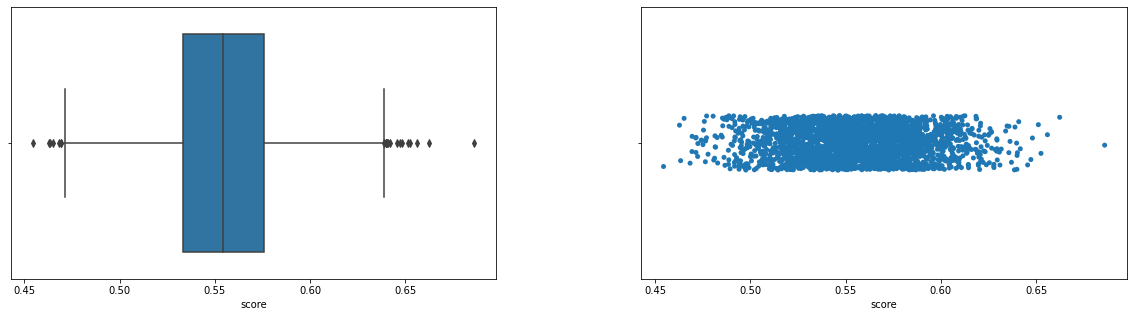

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)

sns.boxplot(data=df, x='score', y=None, ax=axs[0])
sns.stripplot(data=df, x='score', y=None, jitter=True, ax=axs[1])


plt.show()


### Empty fields

## Data Analysis

Find Correlations



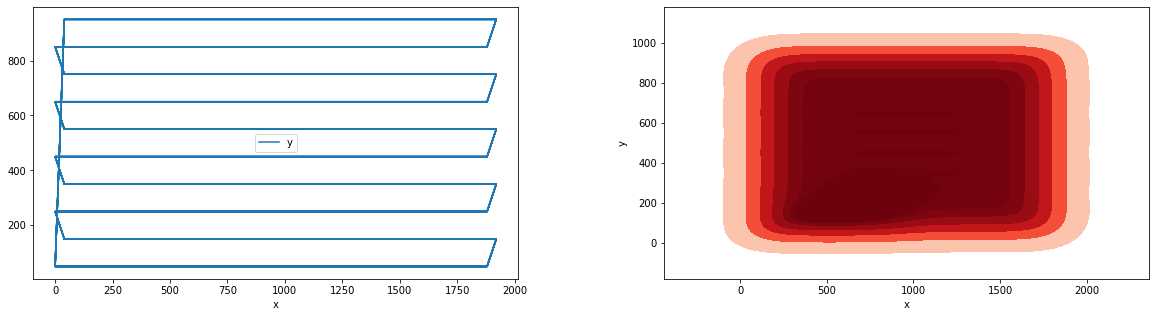

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)

# Set the x and y data
x = df['x']
y = df['y']

# Create the plot
df.plot(x='x', y='y', kind='line', ax=axs[0])

# Use the 'kdeplot' function to create the kernel density plot
sns.kdeplot(df['x'], y=df['y'], cmap="Reds", shade=True, thresh=0.05, ax=axs[1])

# Add labels and customize the plot
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

# Show the plot
plt.show()

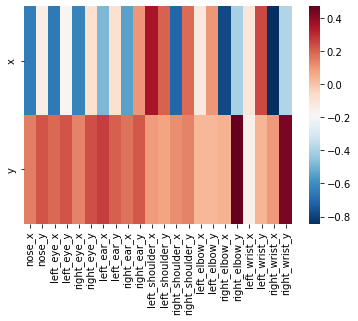

In [ ]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr.iloc[:2, 3:], cmap='RdBu_r')

## Prepare Data

Split the data into training and test sets

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:, 3:]
y = df.iloc[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model

## Build Model

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.metrics import RootMeanSquaredError
from keras.regularizers import l2
from tensorflow.keras.layers.experimental.preprocessing import Normalization

Visualize Model (split code underneath in Steps
https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/


In [ ]:
normalizer = Normalization()
X_train_nor = normalizer(X_train)
X_test_nor = normalizer(X_test)

model = Sequential()
model.add(Dense(128, input_dim=22, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(2))

model.summary()

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy', 'mae'])

history = model.fit(X_train_nor, y_train, epochs=2000, batch_size=32, validation_data=(X_test_nor, y_test))

Epoch 1/2000
64/64 [==============================] - 4s 16ms/step - loss: 200643.6875 - accuracy: 0.7411 - mae: 366.0622 - val_loss: 178558.9531 - val_accuracy: 0.7417 - val_mae: 346.5587
Epoch 2/2000
64/64 [==============================] - 1s 9ms/step - loss: 170192.7812 - accuracy: 0.7411 - mae: 339.2809 - val_loss: 185178.9062 - val_accuracy: 0.7417 - val_mae: 353.1317
Epoch 3/2000
64/64 [==============================] - 1s 9ms/step - loss: 156476.7344 - accuracy: 0.7411 - mae: 325.7542 - val_loss: 172111.5938 - val_accuracy: 0.7417 - val_mae: 331.0091
Epoch 4/2000
64/64 [==============================] - 1s 11ms/step - loss: 149054.1562 - accuracy: 0.7411 - mae: 318.5833 - val_loss: 117258.6250 - val_accuracy: 0.7417 - val_mae: 283.0074
Epoch 5/2000
64/64 [==============================] - 0s 7ms/step - loss: 138714.9219 - accuracy: 0.7411 - mae: 306.1100 - val_loss: 128604.3047 - val_accuracy: 0.7417 - val_mae: 297.0747
Epoch 6/2000
64/64 [==============================] - 1s 1

### Tensorboard

## Evaluate Model

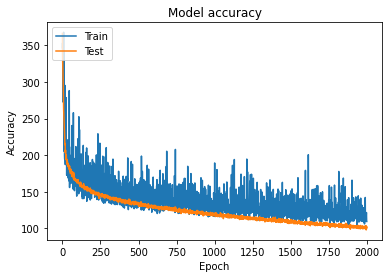

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_mae'])
plt.plot(history.history['mae'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Validate Model with y-y Plot

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)

# Set the x and y data
x = df['x']
y = df['y']

# Create the plot
df.plot(x='x', y='y', kind='line', ax=axs[0])

# Predicted
df.plot(x='x', y='y', kind='line', ax=axs[1])

# Add labels and customize the plot
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

# Show the plot
plt.show()

NameError: ignored

## Export Model

In [ ]:
import tensorflow as tf
from datetime import datetime

# Get the current date and time
now = datetime.now()
date_time_string = now.strftime('%Y%m%d-%H%M')
print(date_time_string)

# Save the model
save_dir = '/content/drive/MyDrive/Poiinter/export/' + date_time_string + '_model'
tf.saved_model.save(model, save_dir)
save_dir = '/content/drive/MyDrive/Poiinter/export/' + date_time_string + '_model.h5'
model.save(save_dir)

20230112-2334


# Results